In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Perceptron

In [40]:
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = np.random.uniform(-0.5, 0.5, 3)  # Adiciona +1 para o termo de polarização
        self.learning_rate = learning_rate

    def predict(self, x):
        activation = np.dot(self.weights[1:], x) + self.weights[0]  # Adiciona o termo de polarização
        return 1 if activation >= 0 else 0

    def train(self, X, y, num_epochs=100):  # Adicionei o parâmetro num_epochs com valor padrão 100
        total_adjustments = 0

        for epoch in range(num_epochs):
            epoch_adjustments = 0

            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                if error != 0:
                    self.weights[1:] += self.learning_rate * error * X[i]
                    self.weights[0] += self.learning_rate * error  # Atualiza o termo de polarização
                    epoch_adjustments += 1

            total_adjustments += epoch_adjustments
            print(f"Epoch {epoch + 1}: Adjustments = {epoch_adjustments}")

        print(f"Total Adjustments: {total_adjustments}")
        print(f"Epochs until convergence: {num_epochs}")

        return total_adjustments, num_epochs
    
    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))

        for i in range(len(X)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o')  # Ajuste aqui
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='o')  # Ajuste aqui

        slope = -self.weights[1] / self.weights[2]  
        intercept = -self.weights[0] / self.weights[2]
        x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)  # Usar a primeira característica para os limites
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='black')

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Decision Boundary')
        plt.show()

# Importando os dados

In [41]:
# Carregando a base de dados
dataset = np.fromfile("dataHoldout.txt")
dataset

array([-0.29322959, -0.09065359,  1.        , ...,  0.72930655,
        0.93224271,  0.        ])

In [42]:
# formato do dataset
dataset.shape

(2400,)

# Processando a base de dados

In [43]:
dataset[0:12]

array([-0.29322959, -0.09065359,  1.        ,  0.07988839,  0.21101297,
        1.        , -0.07825563, -0.08083512,  1.        , -0.46833414,
       -0.10620722,  1.        ])

In [44]:
# Função para mudar o formato "serie" para (x1, x2, yd)
def processamento(time_serie, janela: int):
  # Dados de treino e resposta do treino que serão preenchidos
  treino = []

  # Coloca 2 valores no treino e o 3º no de resposta 
  for i in range(janela, len(time_serie), 3):
    treino.append(time_serie[i - janela:i])

  return treino

In [45]:
# Processando a base de dados
dataset_ = processamento(dataset, 3)

# Mudando para um objeto do numpy
dataset_ = np.array(dataset_)

# Exibindo 5 registros
dataset_[0:5]

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       [-0.46833414, -0.10620722,  1.        ],
       [ 0.46304142,  0.09405471,  1.        ]])

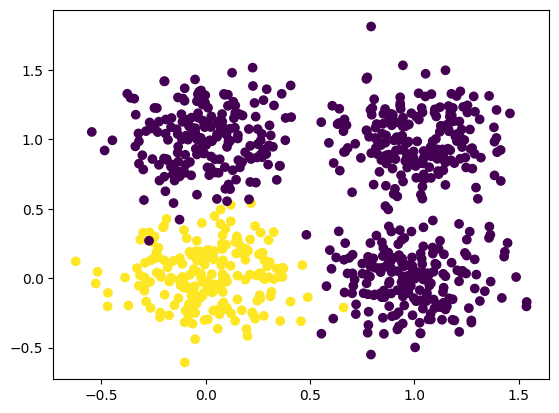

In [46]:
# Exibindo o gráfico para mostrar que o problema não é linearmente separável
plt.scatter(dataset_[:, 0], dataset_[:, 1], c=dataset_[:, 2])
plt.show()

## Separando os dados em treino (70%) e teste (30%)

In [47]:
# Embaralhe os dados
np.random.shuffle(dataset_)

# Defina a proporção (por exemplo, 70% para treinamento)
split_ratio = 0.7
split_index = int(split_ratio * len(dataset_))

# Divida os dados
train_data = dataset_[:split_index]
test_data = dataset_[split_index:]

In [48]:
# Dividindo em treino e teste
X_train, y_train = train_data[:, 0: 2], train_data[:, 2]
X_test, y_test = test_data[:, 0:2], test_data[:, 2]

# Treinamento do modelo

In [49]:
# Inicializar e treinar o perceptron
perceptron = Perceptron(learning_rate=0.1)
total_adjustments, epochs = perceptron.train(X_train, y_train)

Epoch 1: Adjustments = 45
Epoch 2: Adjustments = 28
Epoch 3: Adjustments = 28
Epoch 4: Adjustments = 27
Epoch 5: Adjustments = 15
Epoch 6: Adjustments = 24
Epoch 7: Adjustments = 26
Epoch 8: Adjustments = 33
Epoch 9: Adjustments = 15
Epoch 10: Adjustments = 28
Epoch 11: Adjustments = 20
Epoch 12: Adjustments = 24
Epoch 13: Adjustments = 27
Epoch 14: Adjustments = 19
Epoch 15: Adjustments = 27
Epoch 16: Adjustments = 17
Epoch 17: Adjustments = 23
Epoch 18: Adjustments = 19
Epoch 19: Adjustments = 27
Epoch 20: Adjustments = 17
Epoch 21: Adjustments = 18
Epoch 22: Adjustments = 30
Epoch 23: Adjustments = 24
Epoch 24: Adjustments = 16
Epoch 25: Adjustments = 22
Epoch 26: Adjustments = 29
Epoch 27: Adjustments = 19
Epoch 28: Adjustments = 27
Epoch 29: Adjustments = 17
Epoch 30: Adjustments = 24
Epoch 31: Adjustments = 27
Epoch 32: Adjustments = 17
Epoch 33: Adjustments = 16
Epoch 34: Adjustments = 24
Epoch 35: Adjustments = 24
Epoch 36: Adjustments = 20
Epoch 37: Adjustments = 27
Epoch 38: 

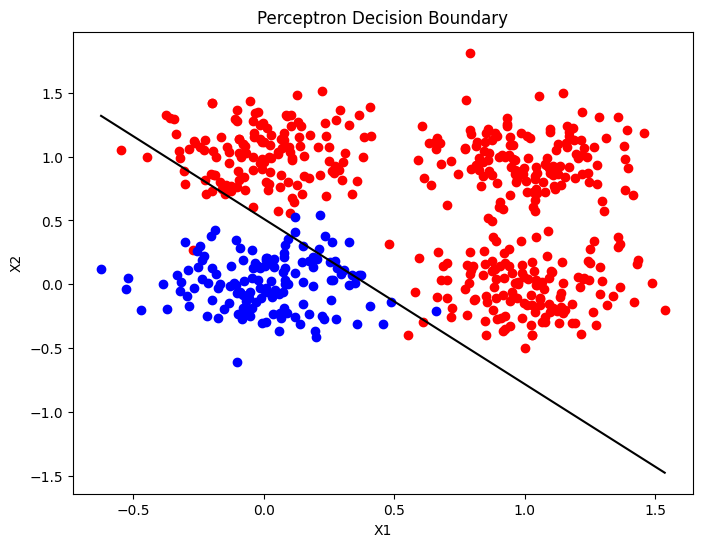

In [50]:
# Plotar o limite de decisão
perceptron.plot_decision_boundary(X_train, y_train)

In [51]:
# Fazendo as previsões
predict = []

for i in range(len(X_test)):
    # Adicionando as rprevisões 
    predict.append(perceptron.predict(X_test[i]))

# Converte para um objeto numpy
predict = np.array(predict)

In [52]:
# Fazendo as previsões para a base de treinamento
predict_train = []

for i in range(len(X_train)):
    # Adicionando as rprevisões 
    predict_train.append(perceptron.predict(X_train[i]))

# Converte para um objeto numpy
predict_train = np.array(predict_train)

# Avaliação

<Axes: >

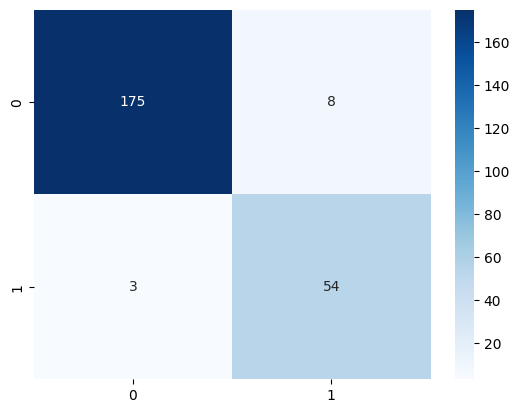

In [53]:
# Matriz de confusão
matriz_conf = confusion_matrix(y_test, predict)
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')

In [54]:
def accuracy(y_true, y_pred):

    assert len(y_true) == len(y_pred), "Os vetores devem ter o mesmo tamanho."
    
    correct_predictions = np.sum(y_true == y_pred)
    total_examples = len(y_true)
    accuracy_value = correct_predictions / total_examples
    
    # Retorna a acurácia
    return accuracy_value

In [55]:
acc_treino = accuracy(y_train, predict_train)
acc_teste = accuracy(y_test, predict)

print(f"Acurácia da base de treino: {acc_treino:.3f}")
print(f"Acurácia da base de teste: {acc_teste:.3f}")

Acurácia da base de treino: 0.962
Acurácia da base de teste: 0.954


In [56]:
# Métricas
print("Dados de treino\n")
print(classification_report(y_test, predict))
print("\n")
print("Dados de teste\n")
print(classification_report(y_train, predict_train))

Dados de treino

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       183
         1.0       0.87      0.95      0.91        57

    accuracy                           0.95       240
   macro avg       0.93      0.95      0.94       240
weighted avg       0.96      0.95      0.95       240



Dados de teste

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       416
         1.0       0.93      0.92      0.93       143

    accuracy                           0.96       559
   macro avg       0.95      0.95      0.95       559
weighted avg       0.96      0.96      0.96       559



## Gráfico

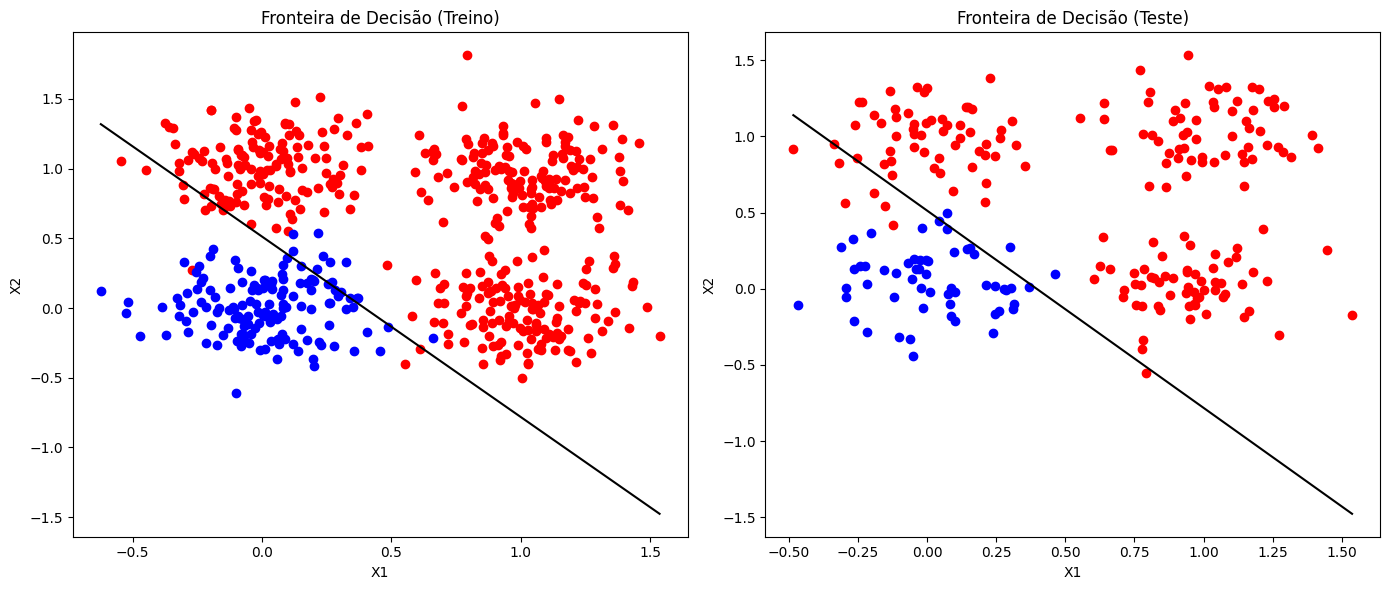

In [57]:
# Função para desenhar a fronteira de decisão em um subplot específico
def plot_decision_boundary(ax, X, y, weights, title):
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i][0], X[i][1], color='red', marker='o')
        else:
            ax.scatter(X[i][0], X[i][1], color='blue', marker='o')

    slope = -weights[1] / weights[2]  
    intercept = -weights[0] / weights[2]
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, color='black')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)

# Função principal para criar o subplot com os dados de treino e teste
def plot_train_test_decision_boundary(X_train, y_train, X_test, y_test, weights):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    plot_decision_boundary(ax1, X_train, y_train, weights, 'Fronteira de Decisão (Treino)')
    plot_decision_boundary(ax2, X_test, y_test, weights, 'Fronteira de Decisão (Teste)')

    plt.tight_layout()
    plt.show()

# Chamando a função e criando o gráfico
plot_train_test_decision_boundary(X_train, y_train, X_test, y_test, perceptron.weights)

# Discussão

<p>A acurácia do modelo perante o conjunto de teste foi de 96%, significando que o modelo classifica 96% exemplos corretamente. Além disso, O F1-Score é alto para ambas as classe, visto que a classe 0 tem precisão (97%) e recall (96%), enquanto a classe 1 tem precisão (93%) e recall (92%).</p>
<p>Em resumo, O modelo parece ter um bom desempenho para um problema que não é linearmente separável.</p>